In [1]:
import json
import numpy as np
import os 

In [7]:
def get_data(result_file):
    f = open(result_file)
    results = json.load(f)
    transcripts = []
    transcripts_tr = []
    trans_rates = []
    rewards = []
    joint_accs = []
    for dialogue_r in results : 
        for turn_r in dialogue_r["dialogue"]:
            transcripts.append(turn_r["transcript"])
            transcripts_tr.append(turn_r["transcript_tran"])
            trans_rates.append(turn_r["transformation_rate"])
            rewards.append(turn_r["reward"])
            joint_accs.append(turn_r["joint_acc"])
           
    f.close()

    return transcripts, transcripts_tr, trans_rates, rewards, joint_accs
    

In [23]:
import random
from RLTest4Chatbot.transformation.transformer import CharDrop, CharInsert, CharReplace
cr = CharReplace()
ci = CharInsert()
cd = CharDrop()
tt, _, _, _,_ = get_data("/home/altaf/Desktop/RLTest4chatbot/Examples/trade/data/test_21.json")
transcripts = tt[0:10]
transcripts
for t in transcripts : 
    trans = random.choice([1, 2, 3])
    print("####")
    if trans == 1:
        print("replace")
        params = cr.sample_(t, 10)
        sentence2,_ = cr.apply(t, params)

    if trans == 2:
        print("insertion")
        params = ci.sample_(t, 10)
        print(params)
        print(params)
        sentence2,_ = ci.apply(t, params)
    if trans == 3:
        print("drop")
        params = cd.sample_(t, 10)
        sentence2,_ = cd.apply(t, params)

   
    print(t)
    print(sentence2)
    print(jaro_distance__(t, sentence2, 2))
    print(jaro_distance__(t, sentence2, 4))

####
drop
could you give me information about a restaurant called panahar?
couldyou gve me nfrmationaboutarestaurnt called panahar
0.1923295454545455
0.1923295454545455
####
replace
could you book a table for me there on friday?
could you book a pable fwe me §here on friday?
0.11352657004830924
0.0817805383022775
####
drop
there will be 4 of us and we would like to eat at 11:00.
there willbe4 of s andwe wuld liketo eat at1100
0.1528622087132726
0.1528622087132726
####
insertion
None
None


TypeError: object of type 'NoneType' has no len()

In [22]:
snetebce =" bonjour la vie "
x = ci.sample_(snetebce, 10)
print

TypeError: object of type 'NoneType' has no len()

In [6]:
import math
def jaro_distance__(s1, s2, mm= 2):
     
    # If the s are equal
    if (s1 == s2):
        return 1.0
 
    # Length of two s
    len1 = len(s1)
    len2 = len(s2)
 
    # Maximum distance upto which matching
    # is allowed
    max_dist = math.floor(max(len1, len2) / mm) - 1
 
    # Count of matches
    match = 0
 
    # Hash for matches
    hash_s1 = [0] * len(s1)
    hash_s2 = [0] * len(s2)
 
    # Traverse through the first
    for i in range(len1):
 
        # Check if there is any matches
        for j in range(max(0, i - max_dist),
                       min(len2, i + max_dist + 1)):
             
            # If there is a match
            if (s1[i] == s2[j] and hash_s2[j] == 0):
                hash_s1[i] = 1
                hash_s2[j] = 1
                match += 1
                break
 
    # If there is no match
    if (match == 0):
        return 0.0
 
    # Number of transpositions
    t = 0
    point = 0
 
    # Count number of occurrences
    # where two characters match but
    # there is a third matched character
    # in between the indices
    for i in range(len1):
        if (hash_s1[i]):
 
            # Find the next matched character
            # in second
            while (hash_s2[point] == 0):
                point += 1
 
            if (s1[i] != s2[point]):
                t += 1
            point += 1
    t = t//2
 
    # Return the Jaro Similarity
    return 1-(match/ len1 + match / len2 +
            (match - t) / match)/ 3.0

In [18]:
trade_result_files = ["test_21_Multi_PDQN_11_3000.json", "test_21_Multi_PDQN_21_3000.json", "test_21_Multi_PDQN_31_3000.json", "test_21_Multi_PDQN_41_3000.json", "test_21_Multi_PDQN_51_3000.json", "test_21_Multi_PDQN_61_3000.json"]
random_result_files = ["test_22_11.json", "test_22_21.json", "test_22_31.json", "test_22_41.json", "test_22_51.json", "test_22_61.json"]
trade_result_files_22 = ["test_22_Multi_PDQN_110_3000.json", "test_22_Multi_PDQN_210_3000.json", "test_22_Multi_PDQN_310_3000.json", "test_22_Multi_PDQN_410_3000.json", "test_22_Multi_PDQN_510_3000.json", "test_22_Multi_PDQN_610_3000.json"]
trade_result_files = ["/home/altaf/Desktop/RLTest4chatbot/Examples/trade/Results/Evaluation/test_21_Multi_PDQN_11_3000.json"]
transcripts, transcripts_tr, trans_rates, rewards, joint_accs, valids= [], [], [], [], [], []
for res_file in trade_result_files :
    res_file = os.path.join("" , res_file)
    transcripts_, transcripts_tr_, trans_rates_, rewards_ , joint_accs_= get_data(res_file)
    transcripts.append(transcripts_)
    transcripts_tr.append(transcripts_tr_)
    trans_rates.append(trans_rates_)
    rewards.append(rewards_)
    joint_accs.append(joint_accs_)
    valids.append([int(t[0]<0.25 and t[0]<0.25) for t in trans_rates_[0]])

In [19]:
trans_rates_

[[0.0, 0.00512820512820511],
 [0.18181818181818182, 0.0],
 [0.0, 0.005847953216374324],
 [0.16666666666666666, 0.0],
 [0.0, 0.01041666666666663],
 [0.1111111111111111, 0.0],
 [0.10526315789473684, 0.0],
 [0.0, 0.08795518207282915],
 [0.0, 0.00520833333333337],
 [0.0, 0.003831417624521105],
 [0.125, 0.0],
 [0.16666666666666666, 0.0],
 [0.0, 0.003875968992248069],
 [0.0, 0.007936507936507908],
 [0.0, 0.011111111111111072],
 [0.08333333333333333, 0.0],
 [0.0, 0.004273504273504258],
 [0.0, 0.02206119162640896],
 [0.0, 0.008333333333333304],
 [0.125, 0.0],
 [0.0, 0.10798798798798792],
 [0.0, 0.007246376811594235],
 [0.0, 0.003236245954692518],
 [0.0, 0.0],
 [0.10526315789473684, 0.0],
 [0.0, 0.05854341736694668],
 [0.0, 0.10235042735042732],
 [0.125, 0.0],
 [0.0, 0.0],
 [0.05555555555555555, 0.0],
 [0.0, 0.026405228758169863],
 [0.0, 0.01449275362318847],
 [0.1111111111111111, 0.0],
 [0.05, 0.0],
 [0.0, 0.006535947712418277],
 [0.0, 0.004830917874396157],
 [0.0, 0.004975124378109541],
 [0.0

In [15]:
print(sum(valids[0])/len(valids[0])*100)
print((1-sum(joint_accs[0])/len(joint_accs[0]))*100)

100.0
6.623931623931623


In [71]:
succs = []
for i in range(len(joint_accs[0])):
    if int(trans_rates[0][i]<0.25):
        succs.append(joint_accs[0][i])

(1- sum(succs)/len(succs))*100


48.14814814814815

In [6]:
trade_result_files = ["test_21_Multi_PDQN_11_3000.json", "test_21_Multi_PDQN_21_3000.json", "test_21_Multi_PDQN_31_3000.json", "test_21_Multi_PDQN_41_3000.json", "test_21_Multi_PDQN_51_3000.json", "test_21_Multi_PDQN_61_3000.json"]
random_result_files = ["test_22_11.json", "test_22_21.json", "test_22_31.json", "test_22_41.json", "test_22_51.json", "test_22_61.json"]
trade_result_files_22 = ["test_22_Multi_PDQN_110_3000.json", "test_22_Multi_PDQN_210_3000.json", "test_22_Multi_PDQN_310_3000.json", "test_22_Multi_PDQN_410_3000.json", "test_22_Multi_PDQN_510_3000.json", "test_22_Multi_PDQN_610_3000.json"]
trade_result_files = ["test_22_synonym_replace_0.01_1.json"]
transcripts, transcripts_tr, trans_rates, rewards, joint_accs, valids= [], [], [], [], [], []
for res_file in trade_result_files :
    res_file = os.path.join("/home/altaf/Desktop/Results/run1_first_config/trade/baseline" , res_file)
    transcripts_, transcripts_tr_, trans_rates_, rewards_ , joint_accs_= get_data(res_file)
    transcripts.append(transcripts_)
    transcripts_tr.append(transcripts_tr_)
    trans_rates.append(trans_rates_)
    rewards.append(rewards_)
    joint_accs.append(joint_accs_)
    valids.append([int(t<0.25) for t in trans_rates_])




In [14]:
import nltk
from py_stringmatching.similarity_measure.monge_elkan import MongeElkan
from RLTest4Chatbot.transformation.helpers import calculate_similarity_sen
me = MongeElkan()
measure = []
valid1 = 0
valid2 = 0
valid3 = 0
valid4 = 0
valid5 = 0
for i in range(len(transcripts_tr[0])):
    print(transcripts_tr[0][i])
    print(transcripts[0][i])
    print(trans_rates[0][i])
    y = 1-me.get_raw_score(nltk.word_tokenize(transcripts[0][i]), nltk.word_tokenize(transcripts_tr[0][i]))
    print(y)
    z = 1- calculate_similarity_sen(transcripts_tr[0][i], transcripts[0][i])
    x = jaro_distance(transcripts_tr[0][i], transcripts[0][i])
    a = jaro_winkler_distance(transcripts_tr[0][i], transcripts[0][i])
    print(z)
    print(x)
    print(a)
    if y<0.25:
        valid2 = valid2 + 1
    if trans_rates[0][1]<0.2:
        valid1 = valid1 +1 
    if z<0.25:
        valid3 = valid3+1

    if x<0.25:
        valid4 = valid4+1

    if a<0.25: 
        valid5 = valid5 +1


    valids.append([int(t<0.2) for t in trans_rates_])


print(valid1)
print(valid2)
print(valid3)
print(valid4)
print(valid5)

can you assist me find_oneself an interesting college to jaw ?
can you help me find an interesting college to visit?
0
0.08737373893911193
0.01986311800144469
0.2212121212121212
0.3981818181818182
can you urge_on unrivaled to chin_wagging in the Centre of town ?
can you recommend one to visit in the centre of town?
0
0.10187389949957526
0.09272468619041763
0.31818181818181823
0.5727272727272728
what 's your preferred of them ? and what is its entrance tip ?
what's your favorite of them? and what is its entrance fee?
0
0.0535714285714286
-0.017933736324863947
0.4004329004329005
0.5606060606060607
i 'm also looking for a restaurant shout the Mohandas_Karamchand_Gandhi . can you help me observe it ?
i'm also looking for a restaurant called the gandhi. can you help me find it?
0.05555555555555555
0.04413580232196379
0.07214899477424308
0.42592592592592593
0.46851851851851856
yes i need it reserve for octet hoi_polloi Billy_Sunday at 12:45 .
yes i need it booked for 8 people sunday at 12:45

/home/altaf/Desktop/RLTest4chatbot/RLTest4Chatbot/transformation/helpers.py:246: RuntimeWarning: invalid value encountered in double_scalars
  return S/Xi


-0.27264059298241694
0.4820707070707071
0.5302777777777778
i would same to arrive by 15.45 i require the ecstasy and going beatnik
i would like to arrive by 15.45 i want the travel and departure time
0.017857142857142856
0.10476190277508324
-0.7674737235016722
0.23809523809523814
0.42857142857142866
give_thanks you . i 'm likewise front for a eatery ... the kymmoy ? do you have any information about it ?
thank you. i'm also looking for a restaurant... the kymmoy? do you have any information about it?
0
0.055090186270800534
0.04264639617330934
0.4857397504456329
0.4857397504456329
i would like to script this for one person at 10:45 on thursday . i need to sire the reference number also . give_thanks for your help !
i would like to book this for 1 person at 10:45 on thursday. i need to get the reference number also. thanks for your help!
0.03571428571428571
0.038387447595596313
0.07609997983113315
0.24941798941798943
0.6484867724867726
tremendous . thank for all your serve !
terrific. th

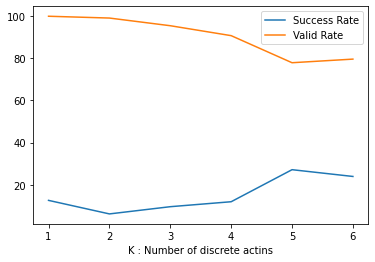

In [5]:
import matplotlib.pyplot as plt
  
# create data
succ = [12.606837606837606, 6.196581196581197, 9.615384615384615, 11.965811965811968, 27.13675213675214, 23.931623931623935]

valid = [99.78632478632478, 98.93162393162393, 95.2991452991453, 90.5982905982906, 77.77777777777779, 79.48717948717949]
k = [1, 2, 3, 4, 5, 6]
  
# plot lines
fig = plt.figure()

plt.plot( k,succ, label = "Success Rate")
plt.plot( k,valid, label = "Valid Rate")
plt.xlabel("K : Number of discrete actins")
plt.legend()
plt.savefig('trade 2.1.png')
plt.show()




In [11]:
random_file = ["test_21_11.json","test_21_21.json","test_21_31.json","test_21_41.json","test_21_51.json","test_21_61.json"]

transcripts, transcripts_tr, trans_rates, rewards, joint_accs, valids= [], [], [], [], [], []
for res_file in random_file :
    res_file = os.path.join("Examples/trade/Results/RandomSampler" , res_file)
    transcripts_, transcripts_tr_, trans_rates_, rewards_ , joint_accs_= get_data(res_file)
    transcripts.append(transcripts_)
    transcripts_tr.append(transcripts_tr_)
    trans_rates.append(trans_rates_)
    rewards.append(rewards_)
    joint_accs.append(joint_accs_)
    valids.append([int(t<0.25) for t in trans_rates_])


In [12]:
n_turn = len(valids[0])
succ = [(1-sum(x)/n_turn)*100 for x in joint_accs] 
valid = [sum(v)/n_turn*100 for v in valids]
print(succ)
print(valid)

[6.41025641025641, 10.04273504273504, 13.034188034188032, 16.025641025641026, 16.666666666666664, 19.017094017094017]
[99.57264957264957, 97.43589743589743, 91.02564102564102, 83.11965811965813, 73.93162393162393, 67.94871794871796]


In [11]:
trade_result_files = ["test_22_Multi_PDQN_110_3000.json","test_22_Multi_PDQN_210_3000.json","test_22_Multi_PDQN_310_3000.json","test_22_Multi_PDQN_410_3000.json","test_22_Multi_PDQN_510_3000.json","test_22_Multi_PDQN_610_3000.json"]


transcripts, transcripts_tr, trans_rates, rewards, joint_accs, valids= [], [], [], [], [], []
for res_file in trade_result_files :
    res_file = os.path.join("/home/altaf/Desktop/Results/run1/trade/2.2/Evaluation" , res_file)
    transcripts_, transcripts_tr_, trans_rates_, rewards_ , joint_accs_= get_data(res_file)
    transcripts.append(transcripts_)
    transcripts_tr.append(transcripts_tr_)
    trans_rates.append(trans_rates_)
    rewards.append(rewards_)
    joint_accs.append(joint_accs_)
    valids.append([int(t<0.25) for t in trans_rates_])


In [12]:
n_turn = len(transcripts[0])
succ = [(1-sum(x)/n_turn)*100 for x in joint_accs] 
valid = [sum(v)/n_turn*100 for v in valids]
print(succ)
print(valid)

[10.8843537414966, 17.460317460317466, 11.564625850340137, 12.925170068027214, 14.739229024943313, 25.850340136054417]
[99.77324263038548, 98.4126984126984, 93.87755102040816, 92.06349206349206, 83.44671201814059, 78.91156462585033]


In [ ]:
import matplotlib.pyplot as plt
  
# create data
succ = [12.606837606837606, 6.196581196581197, 9.615384615384615, 11.965811965811968, 27.13675213675214, 23.931623931623935]

valid = [99.78632478632478, 98.93162393162393, 95.2991452991453, 90.5982905982906, 77.77777777777779, 79.48717948717949]
k = [1, 2, 3, 4, 5, 6]
  
# plot lines
fig = plt.figure()

plt.plot( k,succ, label = "Success Rate")
plt.plot( k,valid, label = "Valid Rate")
plt.xlabel("K : Number of discrete actins")
plt.legend()
plt.savefig('trade 2.1.png')
plt.show()

ipykernel_launcher:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


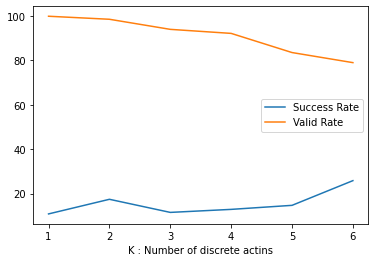

In [39]:
import matplotlib.pyplot as plt
  
# create data
succ = [10.8843537414966, 17.460317460317466, 11.564625850340137, 12.925170068027214, 14.739229024943313, 25.850340136054417]


valid = [99.77324263038548, 98.4126984126984, 93.87755102040816, 92.06349206349206, 83.44671201814059, 78.91156462585033]
k = [1, 2, 3, 4, 5, 6]
  
# plot lines
fig = plt.figure()

plt.plot( k,succ, label = "Success Rate")
plt.plot( k,valid, label = "Valid Rate")
plt.xlabel("K : Number of discrete actins")
plt.legend()
plt.savefig('trade 2.2.png')
plt.show()

In [35]:
stod_result_files = ["test_22_Multi_PDQN_110_1500.json","test_22_Multi_PDQN_210_1500.json","test_22_Multi_PDQN_310_1500.json","test_22_Multi_PDQN_410_1500.json","test_22_Multi_PDQN_510_1500.json","test_22_Multi_PDQN_610_1500.json"]

transcripts, transcripts_tr, trans_rates, rewards, joint_accs, valids= [], [], [], [], [], []
for res_file in stod_result_files :
    res_file = os.path.join("/home/altaf/Desktop/Results/run1/stod/2.2/Evaluation" , res_file)
    transcripts_, transcripts_tr_, trans_rates_, rewards_ , joint_accs_= get_data(res_file)
    transcripts.append(transcripts_)
    transcripts_tr.append(transcripts_tr_)
    trans_rates.append(trans_rates_)
    rewards.append(rewards_)
    joint_accs.append(joint_accs_)
    valids.append([int(t<0.25) for t in trans_rates_])


In [36]:
n_turn = len(transcripts[0])
succ = [(1-sum(x)/n_turn)*100 for x in joint_accs] 
valid = [sum(v)/n_turn*100 for v in valids]
print(succ)
print(valid)

[7.736943907156668, 3.675048355899424, 8.897485493230173, 16.44100580270793, 5.802707930367501, 11.025145067698261]
[99.41972920696325, 98.06576402321083, 94.1972920696325, 90.32882011605416, 92.64990328820116, 77.56286266924565]


ipykernel_launcher:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


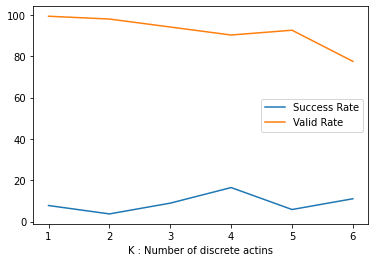

In [38]:
import matplotlib.pyplot as plt
  
# create data
succ = [7.736943907156668, 3.675048355899424, 8.897485493230173, 16.44100580270793, 5.802707930367501, 11.025145067698261]

 
valid = [99.41972920696325, 98.06576402321083, 94.1972920696325, 90.32882011605416, 92.64990328820116, 77.56286266924565]

k = [1, 2, 3, 4, 5, 6]
  
# plot lines
fig = plt.figure()

plt.plot( k,succ, label = "Success Rate")
plt.plot( k,valid, label = "Valid Rate")
plt.xlabel("K : Number of discrete actins")
plt.legend()
plt.savefig('stod 2.2.png')
plt.show()

In [53]:
## for dial test 
import json
f = open("/home/altaf/Desktop/RLTest4chatbot/Examples/trade/Results/baseline/test_22_synonym_replace_0.01_1.json")
results = json.load(f)

trans_rates = []
joint_accs = []
valids = []
for t in results : 
            #transcripts.append(turn_r["transcript"])
            trans_rates.append(t["transformation_rate"])
            #rewards.append(turn_r["reward"])
            joint_accs.append(t["joint_acc"])
valids = [float(t<0.25) for t in trans_rates]

n_turn = len(joint_accs)
succ = sum(joint_accs)/n_turn
valid = sum(valids)/n_turn
print(succ)
print(valid)

0.5374149659863946
0.9954648526077098


In [13]:
import math


def jaro_distance(sentence1, sentence2):
    """
    Computes the Jaro similarity between 2 sequences from:

        Matthew A. Jaro (1989). Advances in record linkage methodology
        as applied to the 1985 census of Tampa Florida. Journal of the
        American Statistical Association. 84 (406): 414–20.

    The Jaro distance between is the min no. of single-character transpositions
    required to change one word into another. The Jaro similarity formula from
    https://en.wikipedia.org/wiki/Jaro%E2%80%93Winkler_distance :

        jaro_sim = 0 if m = 0 else 1/3 * (m/|s_1| + m/s_2 + (m-t)/m)

    where:
        - |s_i| is the length of string s_i
        - m is the no. of matching characters
        - t is the half no. of possible transpositions.
    """
    # split the sentences
    s1, s2 = sentence1.split(), sentence2.split()

    # First, store the length of the strings
    # because they will be re-used several times.
    len_s1, len_s2 = len(s1), len(s2)

    # The upper bound of the distanc for being a matched character.
    match_bound = math.floor( max(len(s1), len(s2)) / 2 ) - 1

    # Initialize the counts for matches and transpositions.
    matches = 0  # no.of matched characters in s1 and s2
    transpositions = 0  # no. transpositions between s1 and s2

    # Iterate through sequences, check for matches and compute transpositions.
    for ch1 in s1:     # Iterate through each character.
        if ch1 in s2:  # Check whether the
            pos1 = s1.index(ch1)
            pos2 = s2.index(ch1)
            if(abs(pos1-pos2) <= match_bound):
                matches += 1
                if(pos1 != pos2):
                    transpositions += 1

    if matches == 0:
        return 0
    else:
        return 1 - 1/3 * ( matches/len_s1 +
                       matches/len_s2 +
                      (matches-transpositions//2) / matches
                     )




In [10]:
def jaro_winkler_distance(s1, s2, p=0.1, max_l=None):
    """
    The Jaro Winkler distance is an extension of the Jaro similarity in:

        William E. Winkler. 1990. String Comparator Metrics and Enhanced
        Decision Rules in the Fellegi-Sunter Model of Record Linkage.
        Proceedings of the Section on Survey Research Methods.
        American Statistical Association: 354–359.

    such that:

        jaro_winkler_sim = jaro_sim + ( l * p * (1 - jaro_sim) )

    where,

        - jaro_sim is the output from the Jaro Similarity, see jaro_similarity()
        - l is the length of common prefix at the start of the string
            - this implementation provides an upperbound for the l value
              to keep the prefixes
        - p is the constant scaling factor to overweigh common prefixes.
          The Jaro-Winkler similarity will fall within the [0, 1] bound,
          given that max(p)<=0.25 , default is p=0.1 in Winkler (1990)

    """
    # Compute the Jaro similarity
    jaro_sim = 1 - jaro_distance(s1, s2)

    # Initialize the upper bound for the no. of prefixes.
    # if user did not pre-define the upperbound, use length of s1
    max_l = max_l if max_l else len(s1)

    # Compute the prefix matches.
    l = 0
    for i in range(min(len(s1),len(s2))):
        if s1[i] == s2[i]:
            l += 1
        else:
            break
        if l == max_l:
            break
    # Return the similarity value as described in docstring.
    return 1 - jaro_sim + ( l * p * (1 - jaro_sim) )

In [ ]:
#####
